## Decision Tree Model

### Induction Algorithm (Greedy Approach)

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('../Datasets/daily_weather.csv')
print(data.shape)
data.head()

(1095, 11)


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


### Data Cleaning

In [5]:
type(data[data.columns[1]])

pandas.core.series.Series

In [6]:
type(data['number'].unique())

numpy.ndarray

In [7]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=1095, step=1)

In [9]:
data.isnull().any()

number                    False
air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

In [10]:
#data[np.isnan(data['air_pressure_9am']) == True & np.isnan(data['air_temp_9am']) == True]

In [11]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [12]:
del data['number']
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [13]:
data =  data.dropna()
data.shape

(1064, 10)

### Classification Task

In [14]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99) * 1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1064    1
1065    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    1
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int32


In [15]:
y = clean_data['high_humidity_label'].copy()
print(y.shape)
y.head()

(1064,)


0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int32

### Morning Features

In [16]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [17]:
x = clean_data[morning_features].copy()
x.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0


In [18]:
x.shape

(1064, 8)

### Test Data and Training Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (352, 8), (712,), (352,))

In [21]:
X_test.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
456,918.800000,80.384000,189.600000,1.767183,80.300000,2.773806,0.0,0.0
845,921.613373,68.658973,70.703555,2.248932,96.844701,3.043049,0.0,0.0
693,917.900000,76.802000,154.100000,2.550112,199.400000,3.400149,0.0,0.0
259,914.830000,74.570000,175.500000,1.409272,153.800000,2.236940,0.0,0.0
723,917.010000,51.836000,130.200000,1.610597,159.900000,2.348787,0.0,0.0


In [22]:
y_train.head()

841    0
75     1
95     0
895    0
699    0
Name: high_humidity_label, dtype: int32

### Fit on training set

In [23]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

### Prediction on test data

In [25]:
predictions = humidity_classifier.predict(X_test)
type(predictions)

numpy.ndarray

In [26]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [27]:
y_test[:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int32

#### Measuring Accuracy

In [28]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8153409090909091

### Chart

In [29]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

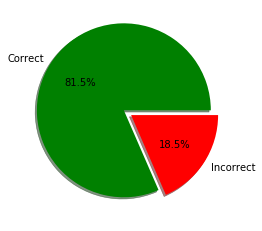

In [30]:
accuracy_percent = accuracy * 100
slices = [accuracy_percent, 100 - accuracy_percent]
activity = ['Correct', 'Incorrect']
cols = ['g', 'r']

plt.pie(slices, labels=activity, colors=cols, shadow=True, autopct='%1.1f%%', explode=(0.1, 0))
plt.show()